<a href="https://colab.research.google.com/github/azam26/OIBSIP/blob/main/Iris%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Loading Dataset** 

In [3]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

In [6]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
#delete the column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# to display no.of samples in each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Preprocessing the Dataset**

In [13]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Exploratrory Data Analysis**

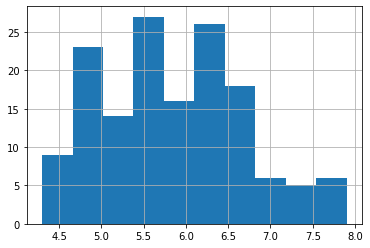

In [17]:
#Histogram
df['SepalLengthCm'].hist()

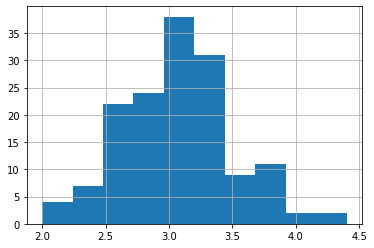

In [18]:
df['SepalWidthCm'].hist()

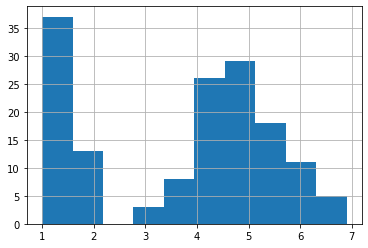

In [19]:
df['PetalLengthCm'].hist()

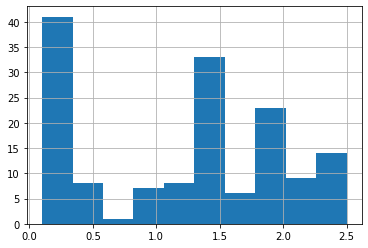

In [20]:
df['PetalWidthCm'].hist()

In [23]:
#Scatterplot
colors = ['orange','Green','Purple']
Species = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']

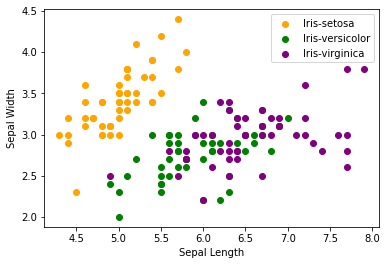

In [24]:
for i in range(3):
  x = df[df['Species'] == Species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label=Species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.legend()

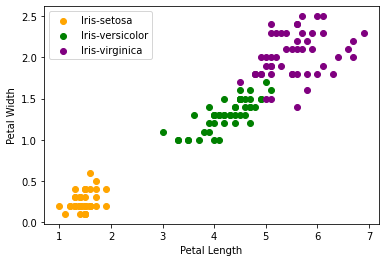

In [25]:
for i in range(3):
  x = df[df['Species'] == Species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label=Species[i])
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.legend()

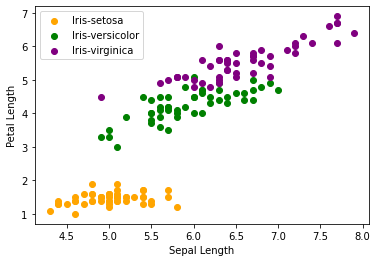

In [26]:
for i in range(3):
  x = df[df['Species'] == Species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = colors[i], label=Species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Petal Length')
  plt.legend()

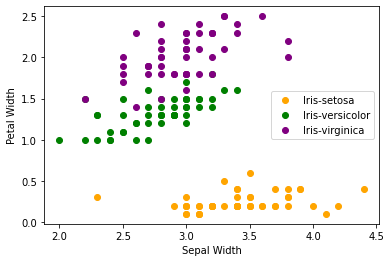

In [28]:
for i in range(3):
  x = df[df['Species'] == Species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c = colors[i], label=Species[i])
  plt.xlabel('Sepal Width')
  plt.ylabel('Petal Width')
  plt.legend()

**Correlation Matrix**

In [29]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


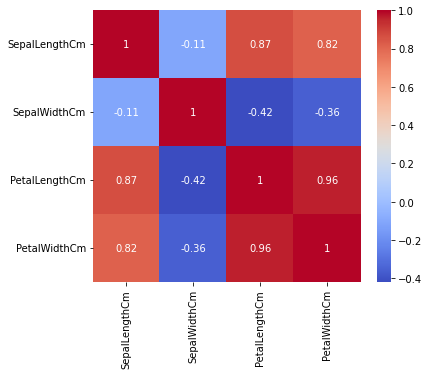

In [35]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

**Label Encoder**

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model Training**

In [73]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30)

In [74]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()


In [75]:
Model.fit(x_train, y_train)

LogisticRegression()

In [76]:
# print Metric to get performance
print('Accuracy: ', Model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [77]:
#knn-k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier()

In [78]:
Model.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
# print Metric to get performance
print('Accuracy: ', Model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [80]:
# decesion tree
from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier()


In [81]:
Model.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
# print Metric to get performance
print('Accuracy: ', Model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556
